In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv')

# Explore the data

In [4]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [5]:
df.shape

(10000, 6)

In [6]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

* **Use one hot encoding to convert strings to integers**

In [7]:
Activities = pd.get_dummies(df['Extracurricular Activities'], dtype=int, drop_first=True)
Activities.head()

,Yes
0,1
1,0
2,1
3,1
4,0


In [8]:
df = pd.concat([df, Activities], axis=1)
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Yes
0,7,99,Yes,9,1,91.0,1
1,4,82,No,4,2,65.0,0
2,8,51,Yes,7,2,45.0,1
3,5,52,Yes,5,2,36.0,1
4,7,75,No,8,5,66.0,0


In [9]:
df.drop('Extracurricular Activities', axis=1, inplace=True)
df.rename(columns = {'Yes':'Extracurricular Activities'}, inplace = True) 
df.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities
0,7,99,9,1,91.0,1
1,4,82,4,2,65.0,0
2,8,51,7,2,45.0,1
3,5,52,5,2,36.0,1
4,7,75,8,5,66.0,0


# Data visualization

In [10]:
import seaborn as sns

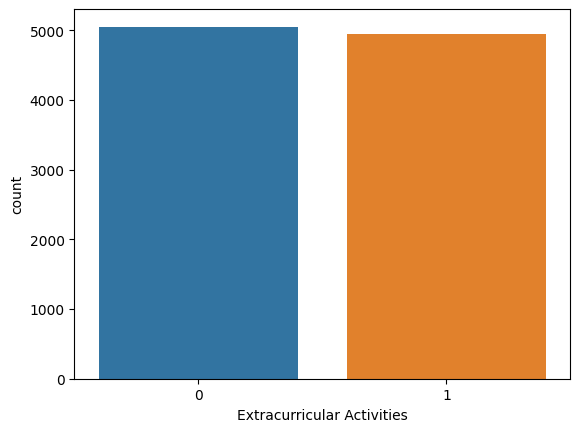

In [11]:
sns.countplot(x='Extracurricular Activities', data=df);

> Approximately half of the students contribute in activities

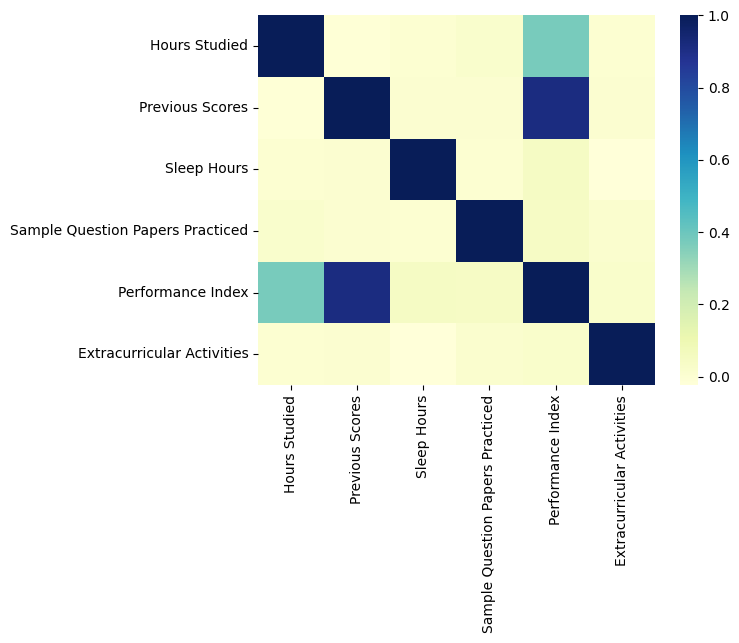

In [12]:
sns.heatmap(df.corr(), cmap='YlGnBu');

> Performance increases with Hours Studied or Previous Scores, so both are the most important features

# Model training

In [16]:
# We are interested in studying the relation between the Hours Studied and the Previous Scores
features = ['Hours Studied', 'Previous Scores']
X = df[features]
y = df['Performance Index']

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 5.241921186551515
R-squared: 0.985855014245765
